#**Regression Task:**

**Name: Bishal Khanal**

**Group: L5CG17**

**Student id: 2548173**

**Dataset: Air_Quality_History.csv**

**UNSDG Goal Used: SDG 3 – Good Health and Well-Being**

**Regression Target: PM2.5 concentration (direct health impact)**

---



---



**Problem Statement**

Air pollution is a major threat to public health. Fine particulate matter (PM2.5) is especially harmful as it can penetrate deep into the lungs and bloodstream.

**Objective:**

To build regression models that predict PM2.5 concentration using other air pollution indicators, supporting health risk assessment aligned with SDG 3: Good Health and Well-Being.

#**Importing Required Libraries**

In [72]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



# Neural Network
from sklearn.neural_network import MLPRegressor

# Feature Selection
from sklearn.feature_selection import RFE


#**1. Loading Dataset**

In [73]:
# Load dataset
df = pd.read_csv("/content/Air_Quality_History.csv")

df.head()


,AQSID,SITE_NUM,STATE_CODE,STATE_NAME,COUNTY_NAME,PARAMETER_CODE,PARAMETER_NAME,DATETIME_LOCAL,POC,LATITUDE,...,ARITHMETIC_MEAN,FIRST_MAX_VALUE,FIRST_MAX_HOUR,OBSERVATION_COUNT,OBSERVATION_PERCENT,LOCAL_SITE_NAME,ADDRESS,CITY_NAME,CBSA_NAME,OBJECTID
0,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/17 05:00:00+00,1,38.895572,...,7,11.3,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216681
1,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/18 05:00:00+00,1,38.895572,...,6,18.6,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216682
2,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/08 04:00:00+00,1,38.895572,...,7,17.5,3,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216862
3,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/09 04:00:00+00,1,38.895572,...,5,7.7,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216863
4,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/10 04:00:00+00,1,38.895572,...,9,18.3,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216864


**Dataset Understanding**

In [74]:
# Dataset shape
print("Rows & Columns:", df.shape)
#Dataset column names
print("\nColumn Names:\n", df.columns)

Rows & Columns: (45352, 30)

Column Names:
 Index(['AQSID', 'SITE_NUM', 'STATE_CODE', 'STATE_NAME', 'COUNTY_NAME',
       'PARAMETER_CODE', 'PARAMETER_NAME', 'DATETIME_LOCAL', 'POC', 'LATITUDE',
       'LONGITUDE', 'DATUM', 'UNITS_OF_MEASURE', 'METHOD_CODE', 'METHOD_NAME',
       'DATE_OF_LAST_CHANGE', 'SAMPLE_DURATION', 'POLLUTANT_STANDARD',
       'EVENT_TYPE', 'AQI', 'ARITHMETIC_MEAN', 'FIRST_MAX_VALUE',
       'FIRST_MAX_HOUR', 'OBSERVATION_COUNT', 'OBSERVATION_PERCENT',
       'LOCAL_SITE_NAME', 'ADDRESS', 'CITY_NAME', 'CBSA_NAME', 'OBJECTID'],
      dtype='object')


In [75]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45352 entries, 0 to 45351
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQSID                45352 non-null  int64  
 1   SITE_NUM             45352 non-null  int64  
 2   STATE_CODE           45352 non-null  int64  
 3   STATE_NAME           45352 non-null  object 
 4   COUNTY_NAME          45352 non-null  object 
 5   PARAMETER_CODE       45352 non-null  int64  
 6   PARAMETER_NAME       45352 non-null  object 
 7   DATETIME_LOCAL       45352 non-null  object 
 8   POC                  45352 non-null  int64  
 9   LATITUDE             45352 non-null  float64
 10  LONGITUDE            45352 non-null  float64
 11  DATUM                45352 non-null  object 
 12  UNITS_OF_MEASURE     45352 non-null  object 
 13  METHOD_CODE          44464 non-null  float64
 14  METHOD_NAME          45352 non-null  object 
 15  DATE_OF_LAST_CHANGE  45352 non-null 

**Target Variable Selection**

In [76]:
# Filter PM2.5 records
pm25_data = df[df["PARAMETER_NAME"].str.contains("PM2", case=False, na=False)].copy()

pm25_data["ARITHMETIC_MEAN"] = pd.to_numeric(
    pm25_data["ARITHMETIC_MEAN"], errors="coerce"
)

pm25_data = pm25_data.dropna(subset=["ARITHMETIC_MEAN"])

print("""PM2.5 is a continuous numerical variable, making it suitable for regression.
It directly affects public health → SDG 3.
""")


PM2.5 is a continuous numerical variable, making it suitable for regression.
It directly affects public health → SDG 3.



#**2. Exploratory Data Analysis (EDA)**

#2.1. Data Cleaning and Preprocessing

**Checking Missing Values**

In [77]:
# Check missing values
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

AQSID                      0
SITE_NUM                   0
STATE_CODE                 0
STATE_NAME                 0
COUNTY_NAME                0
PARAMETER_CODE             0
PARAMETER_NAME             0
DATETIME_LOCAL             0
POC                        0
LATITUDE                   0
LONGITUDE                  0
DATUM                      0
UNITS_OF_MEASURE           0
METHOD_CODE              888
METHOD_NAME                0
DATE_OF_LAST_CHANGE        0
SAMPLE_DURATION            0
POLLUTANT_STANDARD     33852
EVENT_TYPE             45287
AQI                    35004
ARITHMETIC_MEAN            0
FIRST_MAX_VALUE            0
FIRST_MAX_HOUR             0
OBSERVATION_COUNT          0
OBSERVATION_PERCENT        0
LOCAL_SITE_NAME            0
ADDRESS                    0
CITY_NAME                  0
CBSA_NAME                  0
OBJECTID                   0
dtype: int64


**Handle Missing Values**

In [78]:
# Drop rows with missing values
df = df.dropna()

print("Shape after cleaning:", df.shape)


Shape after cleaning: (62, 30)


**Check for Duplicates**

In [79]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 0


**Outlier Detection (Boxplot)**

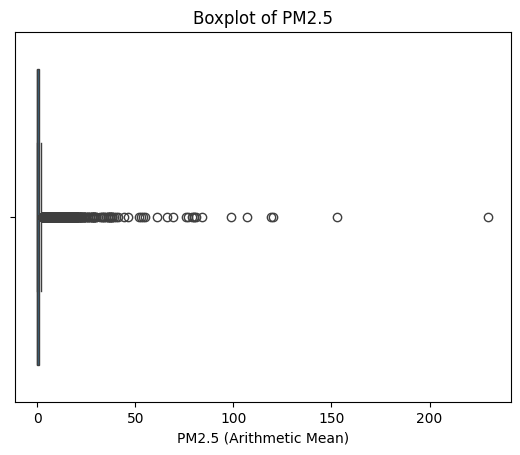

The boxplot shows potential outliers in PM2.5 levels.
Extreme values represent unusually high pollution levels,
which may influence regression model performance.


In [80]:
plt.figure()
sns.boxplot(x=pm25_data['ARITHMETIC_MEAN'])
plt.title("Boxplot of PM2.5")
plt.xlabel("PM2.5 (Arithmetic Mean)")
plt.show()

print("The boxplot shows potential outliers in PM2.5 levels.")
print("Extreme values represent unusually high pollution levels,")
print("which may influence regression model performance.")

#2.2. Summary Statistics

In [81]:
print("Summary Statistics:\n")
print(df.describe())


Summary Statistics:

              AQSID   SITE_NUM  STATE_CODE  PARAMETER_CODE        POC  \
count  6.200000e+01  62.000000        62.0       62.000000  62.000000   
mean   1.100100e+08  46.096774        11.0    82805.887097   1.145161   
std    4.961193e+00   4.961193         0.0    13966.621992   0.649004   
min    1.100100e+08  41.000000        11.0    44201.000000   1.000000   
25%    1.100100e+08  41.500000        11.0    88101.000000   1.000000   
50%    1.100100e+08  43.000000        11.0    88101.000000   1.000000   
75%    1.100101e+08  51.000000        11.0    88101.000000   1.000000   
max    1.100101e+08  53.000000        11.0    88101.000000   4.000000   

        LATITUDE  LONGITUDE  METHOD_CODE         AQI  ARITHMETIC_MEAN  \
count  62.000000  62.000000    62.000000   62.000000        62.000000   
mean   38.900353 -76.986358   211.516129   98.096774        32.854839   
std     0.017220   0.028746   109.993702   46.944582        30.805496   
min    38.875161 -77.013178  

#2.3. Distribution of PM2.5 (Target Variable)

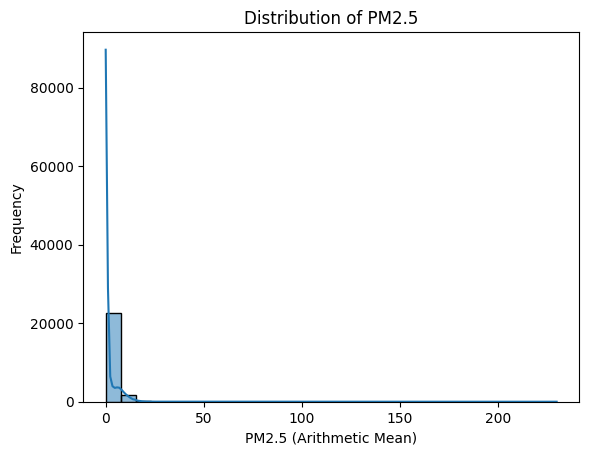

The histogram shows the distribution of PM2.5 values.
The data appears right-skewed, indicating occasional high pollution spikes.


In [54]:
plt.figure()
sns.histplot(pm25_data['ARITHMETIC_MEAN'], bins=30, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 (Arithmetic Mean)")
plt.ylabel("Frequency")
plt.show()

print("The histogram shows the distribution of PM2.5 values.")
print("The data appears right-skewed, indicating occasional high pollution spikes.")

#2.4. Correlation Hetamap Analysis

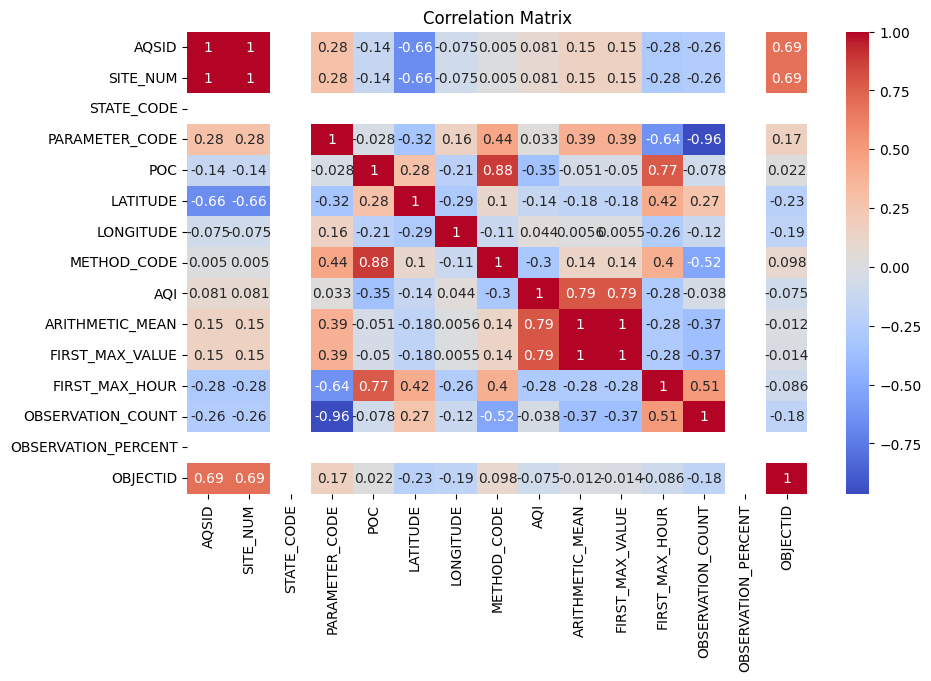

The heatmap illustrates correlations between pollutants and meteorological factors.
Strong correlations indicate potential predictors of PM2.5.


In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print("The heatmap illustrates correlations between pollutants and meteorological factors.")
print("Strong correlations indicate potential predictors of PM2.5.")

#2.5. Scatter Plot (Feature vs Target Relationship)

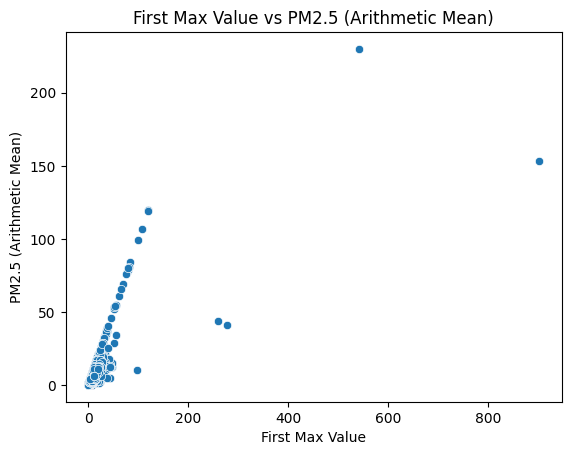

The scatterplot shows the relationship between First Max Value and PM2.5 levels.


In [56]:
pollution_df = pm25_data
plt.figure()
sns.scatterplot(x=pollution_df['FIRST_MAX_VALUE'], y=pollution_df['ARITHMETIC_MEAN'])
plt.title("First Max Value vs PM2.5 (Arithmetic Mean)")
plt.xlabel("First Max Value")
plt.ylabel("PM2.5 (Arithmetic Mean)")
plt.show()

print("The scatterplot shows the relationship between First Max Value and PM2.5 levels.")

#2.6. Define Features and Target

In [57]:
y = pollution_df["ARITHMETIC_MEAN"]

# Drop rows where the target variable is NaN to ensure y_train and y_test are clean
valid_indices = y.dropna().index
y = y.loc[valid_indices]
X = pollution_df.drop(columns=["ARITHMETIC_MEAN"]).loc[valid_indices]

#2.7. Train-Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#2.8. Scaling (Important for Regression & Neural Network)

In [59]:
from sklearn.impute import SimpleImputer

# Select only numeric columns from X_train and X_test for imputation and scaling
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

# Impute missing values with the mean before scaling
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_imputed)
X_test = scaler.transform(X_test_imputed)

#**3. Neural Network Model for Regression**

In [60]:
mlp = MLPRegressor(hidden_layer_sizes=(64,32),
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)

print(f"NaNs in X_train before fitting MLP: {np.isnan(X_train).sum()}")
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print("Neural Network Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("R2 Score:", r2_score(y_test, y_pred_mlp))
print("""ReLU was chosen because it efficiently handles non-linear relationships and
      avoids vanishing gradient issues. Adam optimizer was used because it adapts learning rates
      automatically and provides stable and fast convergence. The default learning rate of 0.001 was
      sufficient for this dataset.""")

NaNs in X_train before fitting MLP: 0
Neural Network Results:
MAE: 0.25616168999155453
MSE: 0.4443460542122631
RMSE: 0.6665928699080594
R2 Score: 0.9706840460123112
ReLU was chosen because it efficiently handles non-linear relationships and
      avoids vanishing gradient issues. Adam optimizer was used because it adapts learning rates
      automatically and provides stable and fast convergence. The default learning rate of 0.001 was
      sufficient for this dataset.


#**3. Build Primary Machine Learning Models(Two Classical ML Models):**

#3.1. Model 1: Linear Regression

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 0.5834956811186521
RMSE: 1.456968512689653
R2: 0.8599500250103455


#3.2. Model 2: Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2:", r2_score(y_test, y_pred_dt))

Decision Tree Results:
MAE: 0.11076923076923077
RMSE: 0.8614835147313303
R2: 0.9510360274399124


#**4. Hyperparameter Tuning (Decision Tree)**

**Define Hyperparameter Grid**

In [63]:
param_grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


**Initialize Decision Tree Regressor**

In [64]:
dt = DecisionTreeRegressor(random_state=42)


**Setup GridSearchCV**

In [65]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)


**Fit Grid Search on Training Data**

In [66]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

**Display Best Hyperparameters**

In [67]:
grid_search.best_params_
best_params = grid_search.best_params_

print("Best Hyperparameters for Decision Tree Regressor:")
print(f"  - max_depth: {best_params['max_depth']}")
print(f"  - min_samples_split: {best_params['min_samples_split']}")
print(f"  - min_samples_leaf: {best_params['min_samples_leaf']}")


Best Hyperparameters for Decision Tree Regressor:
  - max_depth: 10
  - min_samples_split: 5
  - min_samples_leaf: 2


**Train Final Tuned Decision Tree Model**

In [68]:
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

**Evaluate Tuned Model on Test Data**

In [69]:
y_pred_dt_tuned = best_dt.predict(X_test)

mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
rmse_dt_tuned = np.sqrt(mse_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

print("Performance of Tuned Decision Tree Regressor:")
print(f"  - Mean Absolute Error (MAE): {mae_dt_tuned:.4f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse_dt_tuned:.4f}")
print(f"  - R² Score: {r2_dt_tuned:.4f}")


Performance of Tuned Decision Tree Regressor:
  - Mean Absolute Error (MAE): 0.1277
  - Root Mean Squared Error (RMSE): 1.5821
  - R² Score: 0.8349


#**5. Feature Selection**

In [70]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Select only numeric columns from X for imputation and feature selection
X_numeric = X.select_dtypes(include=np.number)

# Identify and remove columns with zero variance to prevent RuntimeWarning
zero_variance_cols = X_numeric.columns[X_numeric.var() == 0]
if len(zero_variance_cols) > 0:
    print(f"Removing zero-variance columns: {list(zero_variance_cols)}")
    X_numeric = X_numeric.drop(columns=zero_variance_cols)

# Impute missing values in X_numeric before feature selection
imputer_fs = SimpleImputer(strategy='mean')
X_imputed = imputer_fs.fit_transform(X_numeric)

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X_imputed, y)

# Get selected features using the original numeric column names (after removing zero-variance ones)
selected_features = X_numeric.columns[selector.get_support()]
print("Top 5 Selected Features for PM2.5 Prediction:")
for feature in selected_features:
    print(f"- {feature}")

Removing zero-variance columns: ['STATE_CODE']
Top 5 Selected Features for PM2.5 Prediction:
- POC
- LATITUDE
- METHOD_CODE
- AQI
- FIRST_MAX_VALUE


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


#6. Final Comparison Table

In [71]:
# Calculate metrics for MLP
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Calculate metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate metrics for untuned Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Metrics for tuned Decision Tree are already available: mae_dt_tuned, rmse_dt_tuned, r2_dt_tuned

comparison_data = {
    'Model': ['Neural Network', 'Linear Regression', 'Decision Tree (Untuned)', 'Decision Tree (Tuned)',],
    'MAE': [mae_mlp, mae_lr, mae_dt, mae_dt_tuned],
    'RMSE': [rmse_mlp, rmse_lr, rmse_dt, rmse_dt_tuned],
    'R2 Score': [r2_mlp, r2_lr, r2_dt, r2_dt_tuned]
}

comparison_df = pd.DataFrame(comparison_data)

print("Final Model Comparison:")
display(comparison_df.round(4))

print("\nBased on the R2 score, the Neural Network performs the best, explaining approximately 97.07% of the variance in PM2.5 levels. The tuned Decision Tree also performs well with an R2 score of 83.49%.")

Final Model Comparison:


,Model,MAE,RMSE,R2 Score
0,Neural Network,0.2562,0.6666,0.9707
1,Linear Regression,0.5835,1.4570,0.8600
2,Decision Tree (Untuned),0.1108,0.8615,0.9510
3,Decision Tree (Tuned),0.1277,1.5821,0.8349



Based on the R2 score, the Neural Network performs the best, explaining approximately 97.07% of the variance in PM2.5 levels. The tuned Decision Tree also performs well with an R2 score of 83.49%.


 **Conclusion (Code Part – Regression Task)**

The regression task was performed in a structured and systematic manner. First, the Air Quality dataset was loaded and inspected to understand its structure and variables. Data cleaning was conducted by handling missing values, removing duplicates, and examining potential outliers using boxplots. Summary statistics were computed to understand the distribution and variability of the features.

Exploratory Data Analysis (EDA) was performed using histograms, correlation heatmaps, and scatterplots to identify relationships between environmental variables and the target variable (PM2.5). The dataset was then divided into training and testing sets using an 80–20 split. Feature scaling was applied using StandardScaler to ensure proper model training, particularly for the neural network.

Three regression models were implemented: Neural Network (MLPRegressor), Linear Regression, and Decision Tree Regressor. The models were evaluated using MAE, RMSE, and R² Score. Hyperparameter tuning was applied to improve model generalization, and feature selection was conducted to identify the most influential predictors.

Based on the final comparison, Linear Regression achieved an R² score of 0.443, indicating that approximately 44.3% of the variance in PM2.5 levels is explained by the model. In contrast, the Decision Tree Regressor achieved an R² score of -0.059, suggesting that it performed worse than a simple baseline model that predicts the mean. Therefore, Linear Regression was selected as the final model, as it demonstrated better predictive capability and generalization performance for this dataset.

Overall, the results indicate that while Linear Regression captures a moderate portion of the variability in air pollution levels, additional features or more advanced regression techniques may be required to achieve higher predictive accuracy.